In [ ]:
pip install numpy pandas scikit-learn matplotlib seaborn

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df=pd.read_csv('titanic_dataset.csv')

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.shape

(891, 12)

In [ ]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


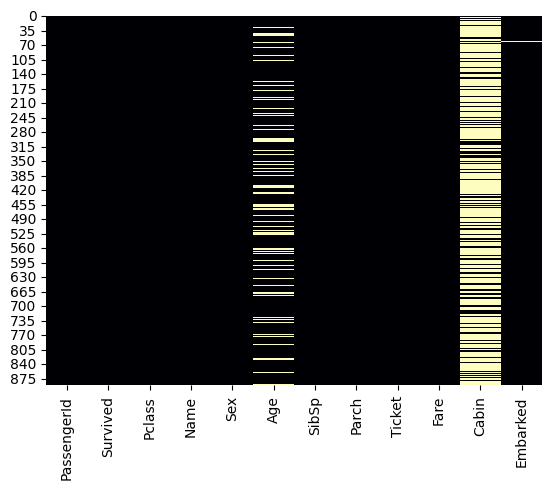

In [ ]:
sns.heatmap(df.isnull(),cmap = 'magma',cbar = False);

In [ ]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
duplicate_rows = df[df.duplicated()]
duplicate_rows

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [ ]:
df.drop(['Cabin', 'PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)

In [ ]:
### convert the gender to binary 0 and 1
df['Sex']=df['Sex'].replace({'male':1,'female':0})
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,S
1,1,1,0,38.0,1,0,71.2833,C
2,1,3,0,26.0,0,0,7.9250,S
3,1,1,0,35.0,1,0,53.1000,S
4,0,3,1,35.0,0,0,8.0500,S


In [ ]:
# Fill missing values in age column by imputing the median
df['Age'].fillna(df['Age'].median(), inplace=True)
df.isna().sum()

,0
Survived,0
Pclass,0
Sex,0
Age,0
SibSp,0
Parch,0
Fare,0
Embarked,2


In [ ]:
# One-hot encoding for 'Embarked'
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)

In [ ]:
# Family size
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

# Is alone
df['IsAlone'] = 1  # default to alone
df.loc[df['FamilySize'] > 1, 'IsAlone'] = 0

# Age bins
df['AgeBin'] = pd.cut(df['Age'], bins=[0, 12, 20, 40, 60, 80], labels=False)

# Fare bins
df['FareBin'] = pd.qcut(df['Fare'], 4, labels=False)


In [ ]:
df.drop(['Age', 'Fare'], axis=1, inplace=True)

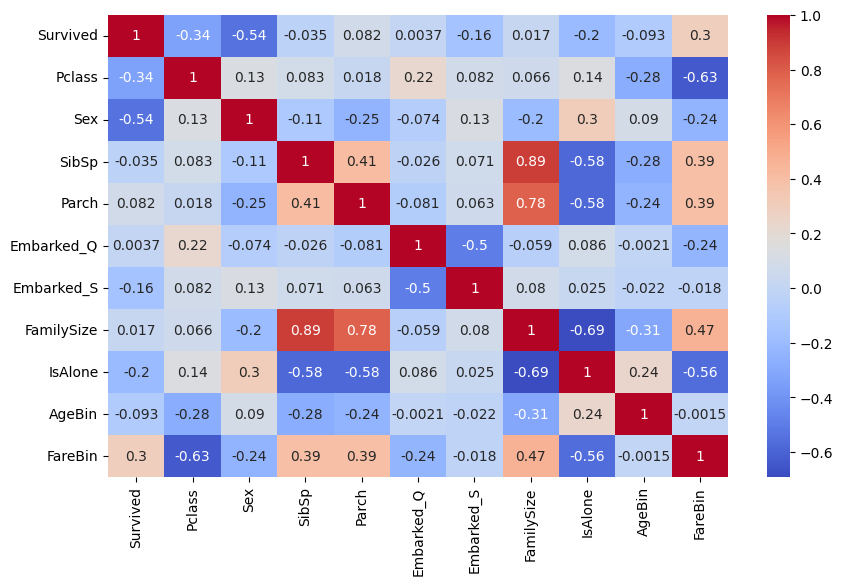

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop('Survived', axis=1)
y = df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# prompt: perform logistic regression

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize and train the Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

print('\nClassification Report:')
print(classification_report(y_test, y_pred))

print('\nConfusion Matrix:')
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.80

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.84      0.83       105
           1       0.77      0.76      0.76        74

    accuracy                           0.80       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.80      0.80      0.80       179


Confusion Matrix:
[[88 17]
 [18 56]]


In [ ]:
# prompt: perform Naive Bayes

from sklearn.naive_bayes import GaussianNB

# Initialize and train the Gaussian Naive Bayes model
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Make predictions
y_pred_nb = nb_model.predict(X_test)

# Evaluate the model
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print(f'\nNaive Bayes Accuracy: {accuracy_nb:.2f}')

print('\nNaive Bayes Classification Report:')
print(classification_report(y_test, y_pred_nb))

print('\nNaive Bayes Confusion Matrix:')
print(confusion_matrix(y_test, y_pred_nb))



Naive Bayes Accuracy: 0.77

Naive Bayes Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.73      0.79       105
           1       0.69      0.82      0.75        74

    accuracy                           0.77       179
   macro avg       0.77      0.78      0.77       179
weighted avg       0.79      0.77      0.77       179


Naive Bayes Confusion Matrix:
[[77 28]
 [13 61]]


In [ ]:
# prompt: perform decision trees

from sklearn.tree import DecisionTreeClassifier

# Initialize and train the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Make predictions
y_pred_dt = dt_model.predict(X_test)

# Evaluate the model
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f'\nDecision Tree Accuracy: {accuracy_dt:.2f}')

print('\nDecision Tree Classification Report:')
print(classification_report(y_test, y_pred_dt))

print('\nDecision Tree Confusion Matrix:')
print(confusion_matrix(y_test, y_pred_dt))


Decision Tree Accuracy: 0.81

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.88      0.84       105
           1       0.80      0.72      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179


Decision Tree Confusion Matrix:
[[92 13]
 [21 53]]


In [ ]:
# prompt: perform random forest

from sklearn.ensemble import RandomForestClassifier

# Initialize and train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42) # n_estimators is the number of trees in the forest
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f'\nRandom Forest Accuracy: {accuracy_rf:.2f}')

print('\nRandom Forest Classification Report:')
print(classification_report(y_test, y_pred_rf))

print('\nRandom Forest Confusion Matrix:')
print(confusion_matrix(y_test, y_pred_rf))


Random Forest Accuracy: 0.83

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.88      0.86       105
           1       0.81      0.76      0.78        74

    accuracy                           0.83       179
   macro avg       0.82      0.82      0.82       179
weighted avg       0.83      0.83      0.83       179


Random Forest Confusion Matrix:
[[92 13]
 [18 56]]


In [ ]:
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import GridSearchCV

# param_grid = {
#     'n_estimators': [100, 200, 300],         # More trees can increase performance
#     'max_depth': [8, 12, 16, None],          # Allow deeper trees
#     'min_samples_split': [2, 3, 4],          # Don't over-regularize
#     'min_samples_leaf': [1, 2],              # Allow smaller leaves
#     'max_features': ['sqrt', 'log2'],        # Control feature selection per split
#     'bootstrap': [True]                      # Keep it true for now
# }

# # Set up Grid Search
# grid = GridSearchCV(
#     estimator=RandomForestClassifier(random_state=42),
#     param_grid=param_grid,
#     cv=5,
#     scoring='accuracy',
#     n_jobs=-1,
#     verbose=2
# )

# # Fit to training data
# grid.fit(X_train, y_train)

# # Output results
# print("Best Parameters:", grid.best_params_)
# print("Best Cross-Validation Accuracy:", grid.best_score_)

# # Evaluate on test set
# best_model = grid.best_estimator_
# test_accuracy = best_model.score(X_test, y_test)
# print("Test Accuracy with tuned parameters:", test_accuracy)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 150, 200],         # Balanced number of trees
    'max_depth': [10, 12, 14, 16],           # Slightly deeper trees (not too deep to avoid overfitting)
    'min_samples_split': [2, 4, 6],          # Regularization control
    'min_samples_leaf': [1, 2, 3],           # Minimum leaf size
    'max_features': ['sqrt', 'log2'],        # Feature subset strategies
    'bootstrap': [True]                      # Keep bootstrapping
}

# Set up Grid Search
grid = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=2
)

# Fit to training data
grid.fit(X_train, y_train)

# Output results
print("Best Parameters:", grid.best_params_)
print("Best Cross-Validation Accuracy:", grid.best_score_)

# Evaluate on test set
best_model = grid.best_estimator_
test_accuracy = best_model.score(X_test, y_test)
print("Test Accuracy with tuned parameters:", test_accuracy)


Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best Parameters: {'bootstrap': True, 'max_depth': 12, 'max_features': 'sqrt', 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 150}
Best Cross-Validation Accuracy: 0.8272431793558555
Test Accuracy with tuned parameters: 0.8212290502793296


In [ ]:
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import GridSearchCV

# # Expanded parameter grid
# param_grid = {
#     'n_estimators': [100, 200, 300, 500],
#     'max_depth': [5, 10, 15, 20, None],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4],
#     'bootstrap': [True, False]
# }

# # GridSearchCV with 5-fold cross-validation
# grid = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
#                     param_grid=param_grid,
#                     cv=5,
#                     scoring='accuracy',
#                     n_jobs=-1,  # use all processors
#                     verbose=2)

# grid.fit(X_train, y_train)

# print("Best Parameters:", grid.best_params_)
# print("Best Cross-Validation Score:", grid.best_score_)

# # Use best model to evaluate on test set
# best_model = grid.best_estimator_
# test_accuracy = best_model.score(X_test, y_test)
# print("Test Accuracy with tuned parameters:", test_accuracy)
